<a href="https://colab.research.google.com/github/FinaAnriani/TugasDataMining5/blob/main/Tugasdatmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Nama : Fina Anriani**
#**NIM : 2209116051**
#**Kelas : Sistem Informasi A 2022**
#**Sesi : A2**

#**Faktor-faktor yang Mempengaruhi seseorang Berbelanja di Online Store**

#**Import Library**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.patches import Patch
from matplotlib.ticker import PercentFormatter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances


#**BUSINESS UNDERSTANDING**

#**Business Objective**

Tujuan bisnis dari dataset ini adalah untuk memahami faktor-faktor yang mempengaruhi seseorang untuk berbelanja di online store. Selain itu juga untuk meningkatkan tingkat konversi pembelian di online store, serta mengoptimalkan strategi marketing online store.

#**Assess Situation**

• Pertumbuhan e-commerce yang pesat.

• Kebutuhan untuk memahami perilaku konsumen online.


#**Data Mining Goals**

• Mengidentifikasi faktor-faktor yang mempengaruhi seseorang untuk berbelanja di online store.

• Membangun model prediktif untuk memprediksi kemungkinan pembelian di online store.

• Memberikan rekomendasi untuk optimasi strategi marketing online store.

#**Project Plan**

Rencana proyek dimulai dengan mengumpulkan data dari berbagai sumber, seperti website online store, database pelanggan, survei online, dan lain-lain. Kemudian data dibersihkan, ditangani missing values nya, dan dilakukan transformasi data. Setelah itu data dianalisis untuk memahami pola dan tren. Lalu dibangun model prediktif menggunakan algoritma data mining yang sesuai. Terakhir, data dievaluasi kinerja model nya dan dipastikan lagi bahwa model sudah baik.

#**DATA UNDERSTANDING**

#**Collect Initial Data**

Dataset **"Online Store Customer data"** ini merupakan sebuah dataset yang berisi data-data dari pelanggan dari toko online. Dataset ini bersumber dari kaggle.

Berikut adalah link nya:
https://www.kaggle.com/datasets/mountboy/online-store-customer-data

In [ ]:
df_file = pd.read_csv('/content/online_store_customer_data.csv')

In [ ]:
df_file

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


#**Describe Data**

#Informasi Dasar

In [ ]:
df_file.shape

(2512, 11)

Dataset **"Online Store Customer Data"** ini merupakan sebuah dataset yang memiliki kolom sebanyak **11 kolom**, dan memiliki baris sebanyak **2512 baris**.

#Informasi Lanjutan

In [ ]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


Jadi kolom yang terdapat dalam dataset **"Online Store Customer Data"** ini adalah sebanyak 11 kolom dan memiliki 2512 baris.


1. Transaction Date (Tipe data: object): Kolom ini berisi tanggal dan waktu terjadinya transaksi.
2. Transaction Id (Tipe data: int64): Kolom ini berisi identifikasi unik untuk setiap transaksi. Biasanya berupa angka atau kombinasi angka dan huruf.
3. Gender (Tipe data: object): Kolom ini berisi informasi tentang jenis kelamin pelanggan.
4. Age (Tipe data: float64): Kolom ini berisi informasi tentang usia pelanggan.
5. Marital Status (Tipe data: object): Kolom ini berisi informasi tentang status pernikahan pelanggan.
6. State Names (Tipe data: object): Kolom ini berisi informasi tentang negara bagian atau provinsi tempat tinggal pelanggan.
7. Segment (Tipe data: object): Kolom ini berisi informasi tentang segmen atau kategori pelanggan.
8. Employees Status	(Tipe data: object): Kolom ini berisi informasi tentang status karyawan pelanggan.
9. Payment Method	(Tipe datta: object): Kolom ini berisi informasi tentang metode pembayaran yang digunakan pelanggan.
10. Referal	(Tipe data: float64): Kolom ini berisi informasi tentang sumber referral atau perujuk pelanggan, misalnya kode promo, iklan tertentu, atau nama referal lainnya.
11. Amount Spent (Tipe data: float64): Kolom ini berisi informasi tentang jumlah yang dibelanjakan pelanggan dalam transaksi tersebut.

#Informasi Statistik Deskriptif

In [ ]:
df_file.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


Kolom:

1. Transaction_ID: Kolom ini berisi ID transaksi, yang merupakan pengenal unik untuk setiap transaksi.
2. Age: Kolom ini berisi usia pelanggan yang melakukan transaksi.
3. Referal: Kolom ini berisi informasi tentang bagaimana pelanggan mengetahui tentang toko, seperti melalui iklan, media sosial, atau dari teman.
4. Amount_spent: Kolom ini berisi jumlah yang dihabiskan pelanggan dalam transaksi.





Baris:

1. count: Baris ini menunjukkan jumlah total transaksi yang dianalisis.
2. mean: Baris ini menunjukkan rata-rata untuk setiap kolom. Dalam hal ini, rata-rata ID transaksi adalah 152443.931131, rata-rata usia pelanggan adalah 46.637652, rata-rata nilai referral adalah 0.652100, dan rata-rata jumlah yang dihabiskan adalah 1418.422577.
3. std: Baris ini menunjukkan standar deviasi untuk setiap kolom. Standar deviasi adalah ukuran seberapa tersebar data di sekitar rata-rata. Semakin tinggi standar deviasi, semakin banyak data yang bervariasi dari rata-rata.
4. min: Baris ini menunjukkan nilai minimum untuk setiap kolom. Nilai minimum adalah nilai terendah yang ditemukan dalam kolom.
5. 25%: Baris ini menunjukkan kuartil pertama untuk setiap kolom. Kuartil pertama adalah nilai yang membagi data menjadi dua bagian, dengan 25% data di bawah kuartil pertama dan 75% data di atasnya.
6. 50%: Baris ini menunjukkan median untuk setiap kolom. Median adalah nilai tengah dalam kumpulan data.
7. 75%: Baris ini menunjukkan kuartil ketiga untuk setiap kolom. Kuartil ketiga adalah nilai yang membagi data menjadi dua bagian, dengan 75% data di bawah kuartil ketiga dan 25% data di atasnya.
8. max: Baris ini menunjukkan nilai maksimum untuk setiap kolom. Nilai maksimum adalah nilai tertinggi yang ditemukan dalam kolom.



#Exploratory Data Analysis

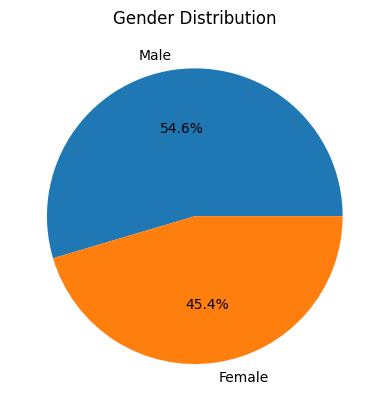

In [ ]:
plt.pie(df_file["Gender"].value_counts(), labels=["Male", "Female"], autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.show()

Visualisasi diatas menunjukkan bahwa proporsi wanita yang berbelanja online lebih tinggi dibandingkan pria. Hal ini dapat disimpulkan bahwa gender merupakan salah satu faktor yang mempengaruhi seseorang berbelanja di online store.

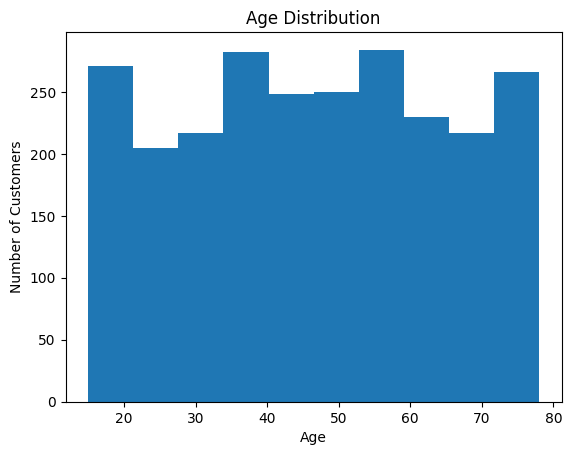

In [ ]:
plt.hist(df_file["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

Visualisasi diatas menunjukkan bahwa pelanggan online store terbanyak berada pada usia 25-45 tahun. Hal ini menunjukkan bahwa usia merupakan faktor penting dalam menentukan target pasar online store.

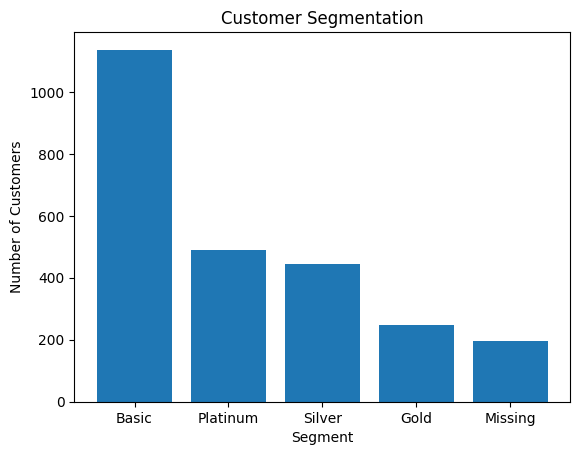

In [ ]:
plt.bar(df_file["Segment"].unique(), df_file["Segment"].value_counts())
plt.title("Customer Segmentation")
plt.xlabel("Segment")
plt.ylabel("Number of Customers")
plt.show()

Visualisasi diatas menunjukkan bahwa sebagian besar pelanggan online store berada di segmen Silver. Hal ini dapat menjadi informasi penting bagi online store untuk menentukan strategi marketing dan promosi yang sesuai dengan segmen Silver.

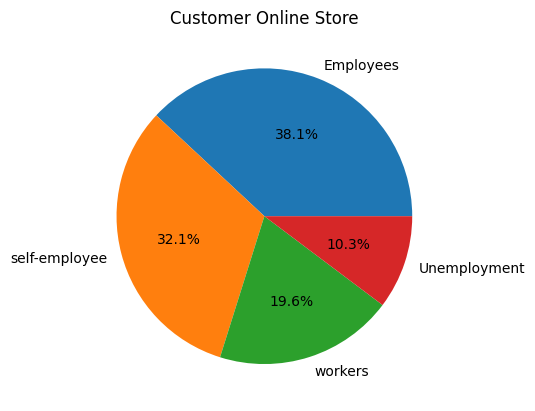

In [ ]:
plt.pie(df_file["Employees_status"].value_counts(), labels=["Employees", "self-employee", "workers", "Unemployment"], autopct="%1.1f%%")
plt.title("Customer Online Store")
plt.show()

Visualisasi diatas menunjukkan bahwa karyawan, wirausaha, dan pekerja lebih banyak melakukan pembelian di online store dibandingkan yang bukan karyawan(tidak memiliki pekerjaan). Hal ini bisa jadi karena gaji dari karyawan, wirausaha, dan pekerja lebih pasti serta mereka memiliki waktu yang terbatas untuk berbelanja di toko fisik dibanding dengan yang bukan karyawan(tidak memiliki pekerjaan).

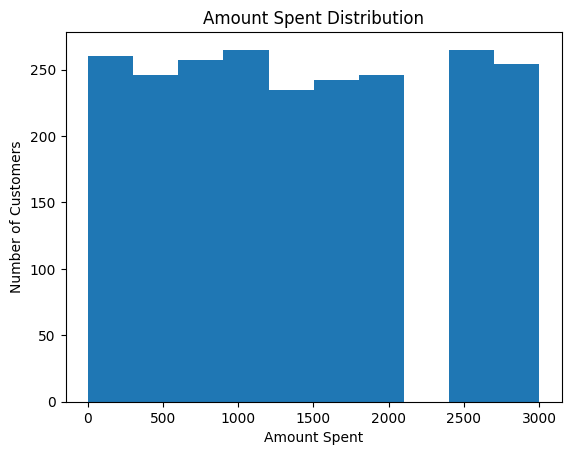

In [ ]:
plt.hist(df_file["Amount_spent"])
plt.title("Amount Spent Distribution")
plt.xlabel("Amount Spent")
plt.ylabel("Number of Customers")
plt.show()

Visualisasi diatas menunjukkan bahwa distribusi pengeluaran pelanggan online store tidak merata. Hal ini menunjukkan bahwa terdapat kelompok pelanggan yang melakukan pembelian dalam jumlah besar (high-value customers).

#**Verify Data Quality**

#Missing Values

In [ ]:
df_file.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

Berdasarkan output dataframe diatas, terdapat missing values pada beberapa kolom dataframe, yakni:

1. Kolom Gender memiliki 28 missing values.
2. Kolom Age memiliki 42 missing values.
2. Kolom Employees Status memiliki 26 missing values.
3. Kolom Referal memiliki 155 missing values.
4. Kolom Transaction Date, Transaction Id, Marital Status, State Names, Segment, dan Payment Method memiliki 0 missing values.

#Outliers Values

In [ ]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df_file = pd.DataFrame(results)
results_df_file.set_index('Kolom', inplace=True)
results_df_file = results_df_file.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df_file)

Kolom,Persentase Outliers
Transaction_ID,0.0
Age,0.0
Referal,0.0
Amount_spent,0.0


Tidak ada outliers

#Duplicated Values

In [ ]:
df_file[df_file.duplicated()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
64,1/25/2019,151259,Male,73.0,Married,West Virginia,Basic,Employees,PayPal,0.0,1397.09
65,1/26/2019,151260,Male,55.0,Married,Kansas,Basic,Employees,Other,1.0,1277.64
66,1/26/2019,151261,Female,72.0,Married,Iowa,Silver,Unemployment,PayPal,NaN,515.77
67,1/26/2019,151262,Male,15.0,Married,South Carolina,Basic,self-employed,Other,1.0,790.10
68,1/27/2019,151263,Female,63.0,Single,Texas,Gold,Employees,Card,1.0,1218.56
109,2/6/2019,151297,Male,60.0,Married,Utah,Silver,Unemployment,Other,1.0,433.20
110,2/7/2019,151298,Female,45.0,Married,Missouri,Platinum,workers,Other,1.0,929.89
111,2/8/2019,151299,Male,33.0,Single,Arizona,Silver,workers,PayPal,0.0,2560.26
112,2/8/2019,151300,Male,24.0,Married,South Carolina,Basic,Unemployment,Other,0.0,NaN
113,2/8/2019,151301,Female,53.0,Single,Colorado,Basic,self-employed,Other,1.0,1888.69


Kolom:
---------
Index:
Kolom ini menunjukkan indeks baris pada dataframe.

False:
Kolom ini berisi nilai boolean yang menunjukkan apakah nilai pada baris tersebut merupakan duplikasi atau tidak. Nilai False menunjukkan bahwa nilai pada baris tersebut tidak duplikat, sedangkan nilai True menunjukkan bahwa nilai pada baris tersebut duplikat.


Baris:
---------
Setiap baris dalam dataframe mewakili satu baris data dalam dataframe asli. Nilai False pada setiap baris menunjukkan bahwa nilai pada baris tersebut tidak ditemukan di baris lain dalam dataframe.

Kesimpulan:
------------
Berdasarkan output dataframe, terdapat beberapa nilai duplikasi dalam dataframe, yakni:

1. Baris 64 dan 109 memiliki nilai yang sama di semua kolom.
2. Baris 66 dan 114 memiliki nilai yang sama di semua kolom kecuali kolom Gender.
3. Baris 67 dan 112 memiliki nilai yang sama di semua kolom kecuali kolom Marital_status.
4. Baris 113 dan 115 memiliki nilai yang sama di semua kolom kecuali kolom Age.

#**DATA PREPARATION**

#**Data Cleaning**

###**Penanganan Missing Values**

#####**Pengecekkan Missing Values**

In [ ]:
print((df_file.isna().sum() / len(df_file)) * 100)

Transaction_date    0.000000
Transaction_ID      0.000000
Gender              1.114650
Age                 1.671975
Marital_status      0.000000
State_names         0.000000
Segment             0.000000
Employees_status    1.035032
Payment_method      0.000000
Referal             6.170382
Amount_spent        9.633758
dtype: float64


Dari output diatas, dapat diketahui bahwa kolom yang memiliki missing values adalah kolom gender, age, employees_status, referal, dan amount_spent.

**Nilai Kosong Pada Kolom Gender**

In [ ]:
df_file[df_file['Gender'].isnull()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
72,1/29/2019,151267,NaN,37.0,Single,Ohio,Basic,Unemployment,Other,1.0,52.08
76,1/30/2019,151271,NaN,48.0,Married,North Dakota,Basic,Unemployment,Card,1.0,828.41
176,3/5/2019,151364,NaN,40.0,Married,Colorado,Missing,self-employed,PayPal,1.0,1089.97
191,3/10/2019,151379,NaN,32.0,Single,Arkansas,Basic,workers,Other,1.0,215.16
207,3/16/2019,151395,NaN,67.0,Single,Illinois,Gold,Employees,Card,1.0,2562.33
212,3/17/2019,151400,NaN,15.0,Single,Maine,Basic,workers,Card,1.0,1038.55
231,3/23/2019,151419,NaN,62.0,Married,North Carolina,Silver,Employees,PayPal,1.0,2909.85
246,3/29/2019,151434,NaN,47.0,Married,South Dakota,Platinum,workers,Other,1.0,NaN
261,4/2/2019,151449,NaN,62.0,Married,New Mexico,Gold,self-employed,PayPal,0.0,1200.69


**Nilai Kosong Pada Kolom Age**

In [ ]:
df_file[df_file['Age'].isnull()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
268,4/4/2019,151456,Female,NaN,Married,New Mexico,Basic,Unemployment,Card,1.0,2863.62
279,4/7/2019,151467,Female,NaN,Married,Nevada,Basic,self-employed,Card,1.0,2414.29
295,4/11/2019,151483,Female,NaN,Single,Indiana,Silver,workers,PayPal,0.0,1925.00
340,4/25/2019,151528,Male,NaN,Single,Texas,Basic,workers,Card,0.0,930.13
450,5/28/2019,151638,Female,NaN,Single,Colorado,Missing,workers,Card,0.0,903.79
518,6/19/2019,151706,Female,NaN,Married,Illinois,Gold,Unemployment,PayPal,NaN,1083.38
540,6/24/2019,151728,Female,NaN,Married,Indiana,Silver,Employees,PayPal,0.0,1940.06
583,7/10/2019,151771,Male,NaN,Single,Kentucky,Basic,Employees,Card,1.0,61.35
657,8/2/2019,151845,Female,NaN,Single,Vermont,Platinum,workers,PayPal,1.0,436.52
732,8/26/2019,151920,Female,NaN,Married,Indiana,Basic,Employees,Card,1.0,1239.91


**Nilai Kosong Pada Kolom Employees_status**

In [ ]:
df_file[df_file['Employees_status'].isnull()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
179,3/6/2019,151367,Female,36.0,Single,Iowa,Basic,NaN,PayPal,1.0,677.36
253,3/31/2019,151441,Female,44.0,Single,Virginia,Platinum,NaN,PayPal,NaN,1226.06
301,4/13/2019,151489,Male,39.0,Single,Mississippi,Silver,NaN,Card,0.0,329.20
447,5/28/2019,151635,Male,60.0,Married,Delaware,Basic,NaN,Card,0.0,176.49
577,7/7/2019,151765,Male,34.0,Married,South Dakota,Basic,NaN,PayPal,1.0,786.73
582,7/9/2019,151770,Female,37.0,Married,Missouri,Silver,NaN,Card,0.0,1624.95
682,8/10/2019,151870,Female,26.0,Single,Florida,Basic,NaN,PayPal,1.0,938.74
688,8/12/2019,151876,Female,69.0,Married,Pennsylvania,Basic,NaN,PayPal,1.0,101.23
788,9/16/2019,151976,Male,71.0,Single,Oregon,Platinum,NaN,PayPal,1.0,1188.81
796,9/20/2019,151984,Female,54.0,Married,Utah,Gold,NaN,Card,1.0,243.97


**Nilai Kosong Pada Kolom Referal**

In [ ]:
df_file[df_file['Referal'].isnull()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
58,1/25/2019,151258,Female,32.0,Single,South Carolina,Basic,Employees,Other,NaN,676.70
61,1/26/2019,151261,Female,72.0,Married,Iowa,Silver,Unemployment,PayPal,NaN,515.77
66,1/26/2019,151261,Female,72.0,Married,Iowa,Silver,Unemployment,PayPal,NaN,515.77
74,1/29/2019,151269,Male,21.0,Married,Montana,Basic,Employees,PayPal,NaN,340.38
77,1/30/2019,151272,Female,69.0,Single,Texas,Missing,workers,Card,NaN,489.47
...,...,...,...,...,...,...,...,...,...,...,...
2358,3/13/2021,153546,Female,61.0,Married,Rhode Island,Basic,Employees,Card,NaN,1295.63
2399,3/25/2021,153587,Female,31.0,Married,Rhode Island,Basic,Employees,Card,NaN,2890.79
2417,4/1/2021,153605,Female,47.0,Married,Minnesota,Basic,workers,Other,NaN,941.84
2472,4/19/2021,153660,Female,16.0,Single,New Jersey,Basic,self-employed,PayPal,NaN,2027.31


**Nilai Kosong Pada Kolom Amount_spent**

In [ ]:
df_file[df_file['Amount_spent'].isnull()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
20,1/8/2019,151220,Female,19.0,Married,Hawaii,Missing,workers,PayPal,0.0,NaN
29,1/12/2019,151229,Female,62.0,Married,Indiana,Silver,Employees,Other,1.0,NaN
30,1/12/2019,151230,Male,17.0,Married,Maine,Basic,Employees,PayPal,1.0,NaN
49,1/22/2019,151249,Female,73.0,Married,Iowa,Basic,Unemployment,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2482,4/23/2021,153670,Female,77.0,Married,Alaska,Silver,workers,PayPal,1.0,NaN
2484,4/24/2021,153672,Male,65.0,Single,Georgia,Basic,Employees,Card,1.0,NaN
2495,4/27/2021,153683,Female,20.0,Married,Washington,Platinum,Employees,Other,0.0,NaN
2496,4/28/2021,153684,Female,33.0,Married,Wyoming,Basic,workers,Card,0.0,NaN


#####**Hapus Missing Values**

Karena persentase nilai kosong pada kolom ***Gender***, ***Age***, ***Employees_status***, ***Referal***, dan ***Amount_spent*** tidak ada yang melebihi 70%, maka tidak ada kolom yang harus dihapus.

#####**Imputasi Missing Values**

####Kolom Gender####

Kolom Gender memiliki missing values < 70%. Karena kolom Gender kategorikal, maka gunakan modus untuk imputasi.

In [ ]:
df_file['Gender'] = df_file['Gender'].fillna(df_file['Gender'].mode()[0])

####Kolom Age####

In [ ]:
df_file['Age'].dropna().describe()

count    2470.000000
mean       46.637652
std        18.186277
min        15.000000
25%        32.000000
50%        47.000000
75%        62.000000
max        78.000000
Name: Age, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom ***Age*** untuk imputasi nilai kosong tersebut

In [ ]:
df_file['Age'] = df_file['Age'].fillna(df_file['Age'].dropna().mean())

####Kolom Employees_status####
Kolom Employees_status memiliki missing values < 70%. Karena kolom Employees_status kategorikal, maka gunakan modus untuk imputasi


In [ ]:
df_file['Employees_status'] = df_file['Employees_status'].fillna(df_file['Employees_status'].mode()[0])

####Kolom Referal####


In [ ]:
df_file['Referal'].dropna().describe()

count    2357.000000
mean        0.652100
std         0.476405
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Referal, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom ***Referal*** untuk imputasi nilai kosong tersebut

In [ ]:
df_file['Referal'] = df_file['Referal'].fillna(df_file['Referal'].dropna().mean())

####Kolom Amount_spent####


In [ ]:
df_file['Amount_spent'].dropna().describe()

count    2270.000000
mean     1418.422577
std       878.507451
min         2.090000
25%       678.192500
50%      1341.435000
75%      2038.102500
max      2999.980000
Name: Amount_spent, dtype: float64

Disini berdasarkan hasil analisis statistik, kita dapat menggunakan mean dari kolom ***Amount_spent*** untuk imputasi nilai kosong tersebut

In [ ]:
df_file['Amount_spent'] = df_file['Amount_spent'].fillna(df_file['Amount_spent'].dropna().mean())

#####**Pengecekkan Ulang**

In [ ]:
pd.DataFrame(df_file.isna().sum() / len(df_file) * 100, columns=['Null Ratio %'])

,Null Ratio %
Transaction_date,0.0
Transaction_ID,0.0
Gender,0.0
Age,0.0
Marital_status,0.0
State_names,0.0
Segment,0.0
Employees_status,0.0
Payment_method,0.0
Referal,0.0


###**Penanganan Duplicated Values**

#####**Pengecekkan Nilai Duplikat**

In [ ]:
df_file[df_file.duplicated()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
64,1/25/2019,151259,Male,73.0,Married,West Virginia,Basic,Employees,PayPal,0.0000,1397.090000
65,1/26/2019,151260,Male,55.0,Married,Kansas,Basic,Employees,Other,1.0000,1277.640000
66,1/26/2019,151261,Female,72.0,Married,Iowa,Silver,Unemployment,PayPal,0.6521,515.770000
67,1/26/2019,151262,Male,15.0,Married,South Carolina,Basic,self-employed,Other,1.0000,790.100000
68,1/27/2019,151263,Female,63.0,Single,Texas,Gold,Employees,Card,1.0000,1218.560000
109,2/6/2019,151297,Male,60.0,Married,Utah,Silver,Unemployment,Other,1.0000,433.200000
110,2/7/2019,151298,Female,45.0,Married,Missouri,Platinum,workers,Other,1.0000,929.890000
111,2/8/2019,151299,Male,33.0,Single,Arizona,Silver,workers,PayPal,0.0000,2560.260000
112,2/8/2019,151300,Male,24.0,Married,South Carolina,Basic,Unemployment,Other,0.0000,1418.422577
113,2/8/2019,151301,Female,53.0,Single,Colorado,Basic,self-employed,Other,1.0000,1888.690000


Output diatas menampilkan kolom/baris apa saja yang memiliki nilai duplikat.

#####**Hapus Nilai Duplikat**

In [ ]:
df_file = df_file.drop_duplicates()

In [ ]:
df_file

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.360000
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.040000
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.600000
3,1/1/2019,151203,Female,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.790000
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,1418.422577
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.100000
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.880000
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.070000
2510,5/1/2021,153698,Female,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.770000


Pada output diatas, kolom/baris yang memiliki nilai yang terduplikat telah dihapus.

###**Penanganan Outliers**

#####**Pengecekkan Outliers**

In [ ]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Transaction_ID,0.0
Age,0.0
Referal,0.0
Amount_spent,0.0


Pada dataset ini, **tidak terdapat outliers**.

#####**Pengecekkan Ulang**

In [ ]:
results = []

cols = df_file.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df_file[col].quantile(0.25)
  q3 = df_file[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df_file[(df_file[col] < lower_bound) | (df_file[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df_file))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

display(results_df_file)

Kolom,Persentase Outliers
Transaction_ID,0.0
Age,0.0
Referal,0.0
Amount_spent,0.0


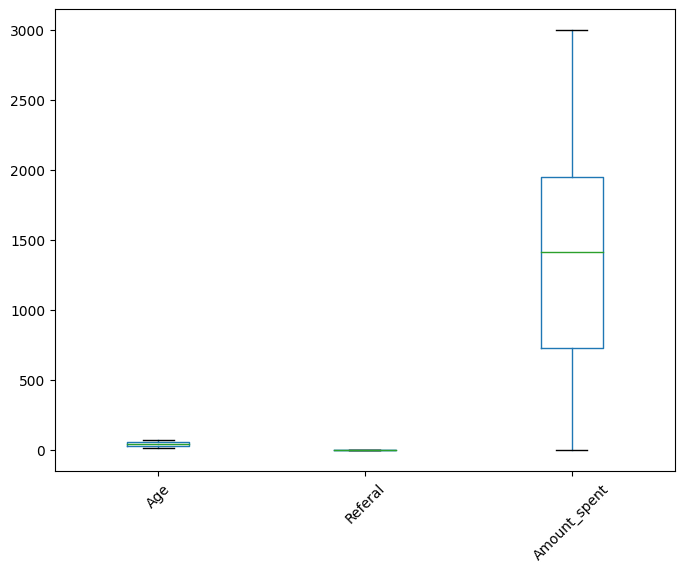

In [ ]:
boxplot = df_file.drop('Transaction_ID', axis=1).boxplot(grid=False, rot=45,  figsize=(8,6))

#**Construct Data**

###**Melakukan Rekayasa Fitur (Feature Engineering)**

In [ ]:
def categorize_age(age):
    if age < 18:
        return 'Child'
    elif 18 <= age < 60:
        return 'Adult'
    else:
        return 'Elderly'

df_file['AgeCategory'] = df_file['Age'].apply(categorize_age)

<ipython-input-499-37a7d73650f1>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_file

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent,AgeCategory
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.360000,Adult
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.040000,Adult
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.600000,Elderly
3,1/1/2019,151203,Female,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.790000,Adult
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,1418.422577,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.100000,Adult
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.880000,Adult
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.070000,Adult
2510,5/1/2021,153698,Female,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.770000,Adult


Code dan output di atas merupakan pembuatan fitur baru yakni AgeCategory yang merupakan kategori dari umur. Dimana ada kategori Child/Anak-anak: <18 tahun, Adult/Dewasa: 18<=<60 tahun, dan Elderly/Lansia: >60 tahun.

In [ ]:
def categorize_amount_spent(amount_spent):
    if amount_spent < 1023:
        return 'Small'
    elif amount_spent < 1542:
        return 'Medium'
    else:
        return 'Large'

df_file['AmountSpentCategory'] = df_file['Amount_spent'].apply(categorize_amount_spent)

<ipython-input-501-00b7015d5836>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_file

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent,AgeCategory,AmountSpentCategory
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.360000,Adult,Large
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.040000,Adult,Small
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.600000,Elderly,Large
3,1/1/2019,151203,Female,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.790000,Adult,Medium
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,1418.422577,Adult,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.100000,Adult,Small
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.880000,Adult,Small
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.070000,Adult,Large
2510,5/1/2021,153698,Female,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.770000,Adult,Large


Code dan output di atas merupakan pembuatan fitur baru yakni AmountSpentCategory yang merupakan kategori dari jumlah pembelian. Dimana ada kategori Small/Kecil: <1023, Large/Besar: =>1542, dan Medium/Sedang: <1542.

###**Pengecekkan Hasil**

In [ ]:
df_file.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent,AgeCategory,AmountSpentCategory
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.360000,Adult,Large
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.040000,Adult,Small
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.600000,Elderly,Large
3,1/1/2019,151203,Female,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.790000,Adult,Medium
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,1418.422577,Adult,Medium


#**Data Reduct**

###**Mengurangi Fitur - Fitur Yang Kurang Relevan**

In [ ]:
df_file_corr = df_file.corr(numeric_only=True)
px.imshow(df_file_corr)

In [ ]:
df_file = df_file.drop(['Transaction_ID','Transaction_date','State_names','Segment','Payment_method'], axis=1)

In [ ]:
df_file

,Gender,Age,Marital_status,Employees_status,Referal,Amount_spent,AgeCategory,AmountSpentCategory
0,Female,19.0,Single,Unemployment,1.0,2051.360000,Adult,Large
1,Male,49.0,Single,self-employed,0.0,544.040000,Adult,Small
2,Male,63.0,Married,workers,1.0,1572.600000,Elderly,Large
3,Female,18.0,Single,workers,1.0,1199.790000,Adult,Medium
4,Male,27.0,Single,self-employed,0.0,1418.422577,Adult,Medium
...,...,...,...,...,...,...,...,...
2507,Female,57.0,Single,self-employed,0.0,150.100000,Adult,Small
2508,Female,36.0,Married,self-employed,1.0,708.880000,Adult,Small
2509,Male,22.0,Single,workers,1.0,2030.070000,Adult,Large
2510,Female,44.0,Single,Employees,0.0,1909.770000,Adult,Large


Pada tahap ini, telah di lakukan pengurangan fitur yang tidak relevan serta fitur yang memiliki banyak sekali uniq values, yakni 'Transaction_ID','Transaction_date', 'State_names','Segment', 'Payment_method'.

#**Data Transformation**

###**Mapping**

In [ ]:
df_file['Gender'] = df_file['Gender'].map({'Male':1,'Female':0})
df_file['Marital_status'] = df_file['Marital_status'].map({'Single':1,'Married':0})
df_file['Employees_status'] = df_file['Employees_status'].map({'Employees':1,'workers':2,'self-employed':3,'Unemployment':4})
df_file['AgeCategory'] = df_file['AgeCategory'].map({'Child':1,'Adult':2, 'Elderly':3}).astype(int)
df_file['AmountSpentCategory'] = df_file['AmountSpentCategory'].map({'Small':1,'Medium':2, 'Large':3}).astype(int)

In [ ]:
df_file

,Gender,Age,Marital_status,Employees_status,Referal,Amount_spent,AgeCategory,AmountSpentCategory
0,0,19.0,1,4,1.0,2051.360000,2,3
1,1,49.0,1,3,0.0,544.040000,2,1
2,1,63.0,0,2,1.0,1572.600000,3,3
3,0,18.0,1,2,1.0,1199.790000,2,2
4,1,27.0,1,3,0.0,1418.422577,2,2
...,...,...,...,...,...,...,...,...
2507,0,57.0,1,3,0.0,150.100000,2,1
2508,0,36.0,0,3,1.0,708.880000,2,1
2509,1,22.0,1,2,1.0,2030.070000,2,3
2510,0,44.0,1,1,0.0,1909.770000,2,3


Pada tahap mapping ini, data pada fitur berupa object telah diubah menjadi numeric agar lebih mudah pada saat pemodelan nanti. Yang diubah yakni fitur gender, marital_status, employees_status, dan agecategory.

###**Encoding**

In [ ]:
df_file = pd.get_dummies(df_file)

###**Pengecekkan Hasil**

In [ ]:
df_file.head()

,Gender,Age,Marital_status,Employees_status,Referal,Amount_spent,AgeCategory,AmountSpentCategory
0,0,19.0,1,4,1.0,2051.360000,2,3
1,1,49.0,1,3,0.0,544.040000,2,1
2,1,63.0,0,2,1.0,1572.600000,3,3
3,0,18.0,1,2,1.0,1199.790000,2,2
4,1,27.0,1,3,0.0,1418.422577,2,2


#####Menyimpan Data yang telah di cleaning#####

In [ ]:
df_file.to_csv("online-store-customer-data-cleaned.csv")

#**Select Modeling Techniques**

Algoritma Asosiatif:

Algoritma asosiatif digunakan untuk menemukan hubungan antara variabel dalam data, seperti asosiasi antara item dalam data transaksional.
Contoh algoritma asosiatif termasuk Apriori dan FP-Growth untuk penambangan aturan asosiasi dalam data transaksional.
Algoritma asosiatif membantu dalam mengidentifikasi pola atau korelasi yang mungkin tersembunyi dalam data, seperti kebiasaan pembelian pelanggan atau hubungan antara variabel dalam dataset.

#**Modelling Associate**

###**Pre-Processing**

#####**Validasi Silang**

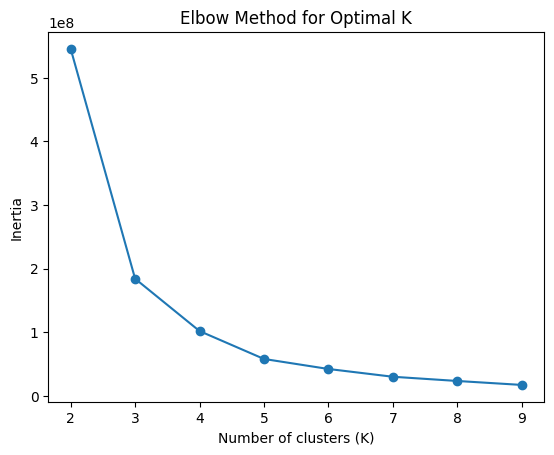

In [ ]:
inertia_values = []

k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_file)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.show()

Code tersebut mengimplementasikan metode "Elbow" untuk menentukan jumlah kluster optimal dalam algoritma K-Means. Plot inertia terhadap jumlah kluster digunakan untuk menemukan titik "elbow", yang menandakan jumlah kluster optimal yang harus dipilih.

###**Build Model**

#####**K-Means**

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_file)

KMeans(n_clusters=3, random_state=42)

Code tersebut menggunakan algoritma K-Means untuk mengelompokkan data dalam df_file menjadi 4 klaster. Model K-Means dilatih dengan menggunakan data tersebut.

#####**Hierarchical Clustering**

In [ ]:
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

Code tersebut menggunakan algoritma Hierarchical Agglomerative Clustering (HAC) untuk mengelompokkan data menjadi 4 klaster. Metode pengukuran jarak antar titik menggunakan metrik Euclidean dan metode penggabungan klaster menggunakan metode ward.

###**Begins and Compare Clusters**

In [ ]:
kmeans_clust = kmeans.predict(df_file)
hierarchy_clust = hc.fit_predict(df_file)

Code tersebut melakukan prediksi klaster untuk setiap data dalam df_file menggunakan model K-Means (kmeans) dan model Hierarchical Agglomerative Clustering (hc) yang telah dilatih sebelumnya.

In [ ]:
x_final = pd.DataFrame(df_file).reset_index(inplace=True)

kmeans_col = pd.DataFrame(kmeans_clust, columns=["kmeans_cluster"])
hierarchy_col = pd.DataFrame(hierarchy_clust, columns=["hierarchy_cluster"])

combined_data_assoc = pd.concat([df_file, kmeans_col, hierarchy_col], axis=1)

Code tersebut menggabungkan hasil klaster dari model K-Means dan Hierarchical Agglomerative Clustering dengan data asli dari df_file ke dalam satu DataFrame. Variabel x_final tidak diperlukan karena digunakan untuk mengatur ulang indeks DataFrame yang sudah ada. Variabel combined_data_assoc berisi data asli df_file bersama dengan kolom-kolom yang menunjukkan klaster hasil prediksi dari K-Means dan Hierarchical Agglomerative Clustering.

In [ ]:
combined_data_assoc

,index,Gender,Age,Marital_status,Employees_status,Referal,Amount_spent,AgeCategory,AmountSpentCategory,kmeans_cluster,hierarchy_cluster
0,0,0,19.0,1,4,1.0,2051.360000,2,3,1,1
1,1,1,49.0,1,3,0.0,544.040000,2,1,0,0
2,2,1,63.0,0,2,1.0,1572.600000,3,3,1,1
3,3,0,18.0,1,2,1.0,1199.790000,2,2,1,1
4,4,1,27.0,1,3,0.0,1418.422577,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2495,2507,0,57.0,1,3,0.0,150.100000,2,1,0,0
2496,2508,0,36.0,0,3,1.0,708.880000,2,1,0,0
2497,2509,1,22.0,1,2,1.0,2030.070000,2,3,1,1
2498,2510,0,44.0,1,1,0.0,1909.770000,2,3,1,1


Tabel diatas adalah hasilnya.

#**Visualisasi**

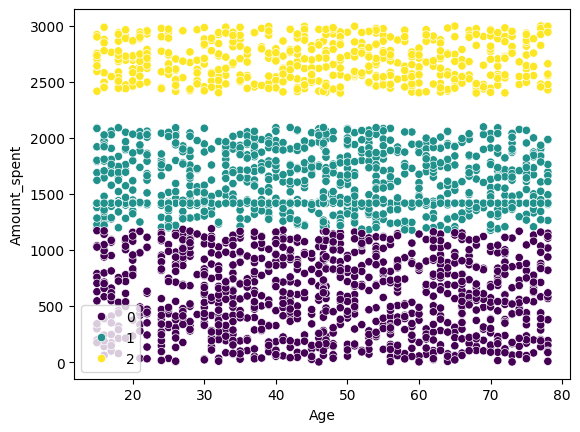

In [ ]:
sns.scatterplot(data=combined_data_assoc, x='Age', y='Amount_spent', hue='hierarchy_cluster', palette='viridis')

# Tampilkan plot
plt.xlabel('Age')
plt.ylabel('Amount_spent')
plt.legend(loc='best')
plt.show()

Code tersebut menggunakan pustaka Seaborn untuk membuat scatter plot dari data yang telah digabungkan (combined_data_assoc). Plot ini menunjukkan hubungan antara usia (Age) dan jumlah yang dihabiskan (Amount_spent), dengan pewarnaan berdasarkan klaster hasil prediksi dari model Hierarchical Agglomerative Clustering (hierarchy_cluster). Label sumbu x dan sumbu y ditambahkan menggunakan plt.xlabel() dan plt.ylabel(), sedangkan legenda untuk klaster ditampilkan dengan plt.legend(). Akhirnya, plot ditampilkan dengan plt.show().

Visualisasi data ini menunjukkan bahwa:

1. Pembeli berusia 20-an rata-rata menghabiskan Rp 500.000 per transaksi online.
2. Pengeluaran rata-rata pembeli terus meningkat hingga mencapai puncaknya pada usia 40-an, dengan rata-rata Rp 3.000.000 per transaksi.
3. Setelah itu, pengeluaran rata-rata pembeli mulai menurun. Pembeli berusia 50-an rata-rata menghabiskan Rp 2.500.000, dan pembeli berusia 60-an rata-rata menghabiskan Rp 2.000.000 per transaksi.
4. Penurunan ini terus berlanjut hingga usia 80-an, di mana pembeli rata-rata hanya menghabiskan Rp 1.000.000 per transaksi.

Visualisasi ini menunjukkan bahwa terdapat hubungan antara usia pembeli dan rata-rata pengeluaran mereka di toko online. Pembeli di usia 40-an memiliki rata-rata pengeluaran tertinggi, diikuti oleh pembeli di usia 30-an dan 50-an. Pengeluaran rata-rata kemudian menurun seiring dengan bertambahnya usia pembeli.

# **Asosiatif Evaluation**

###**Evaluate Results**

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np

In [ ]:
def dunn_index(X, labels):
    """
    Menghitung Dunn Index untuk pengelompokan data.

    Parameters:
    - X: array-like, shape (n_samples, n_features)
        Data input.
    - labels: array-like, shape (n_samples,)
        Label pengelompokan untuk setiap sampel.

    Returns:
    - dunn_index: float
        Nilai Dunn Index.
    """
    unique_labels = np.unique(labels)
    cluster_distances = []

    for label in unique_labels:
        cluster_points = X[labels == label]
        intra_cluster_distances = np.linalg.norm(cluster_points - np.mean(cluster_points, axis=0), axis=1)
        cluster_distances.append(np.mean(intra_cluster_distances))

    cluster_distances = np.array(cluster_distances)
    min_inter_cluster_distance = np.min(np.linalg.norm(cluster_distances[:, np.newaxis] - cluster_distances, axis=1))

    max_intra_cluster_distance = np.max(cluster_distances)

    dunn_index = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index


dunn_score_kmeans = dunn_index(df_file, kmeans.labels_)
dunn_score_hc = dunn_index(df_file, hierarchy_clust)

metrics.append("Dunn Index")
scores_kmeans.append(dunn_score_kmeans)
scores_hc.append(dunn_score_hc)

df_scores = pd.DataFrame({'': metrics,
                          'KMeans Score': scores_kmeans,
                          'Agglomerative Clustering Score': scores_hc
})

df_scores = df_scores.set_index('')
df_scores = df_scores.T

display(df_scores)

,Silhouette Score,Calinski-Harabasz Score,Davies-Bouldin Score,Dunn Index
KMeans Score,0.384938,1992.338275,0.886173,0.038984
Agglomerative Clustering Score,0.210554,2.691666,0.561651,0.060905


- Silhouette : Mendekati 1, maka data yang digunakan sangat cocok dengan kluster yang terbagi. Kalau 0, maka data mendekati batas luar kedua kluster. Kalau mendekati -1 berarti data salah ditempatkan pada kluster yang seharusnya (penempatan kluster salah).

- Calinski-Harabasz Score : Semakin tinggi, maka kluster terpisah semakin baik.

- Davies-Bouldin : Semakin kecil, maka semakin baik kluster terpisah.

- Dunn Index: Semakin besar nilai, semakin baik pengelompokan data, sedangkan semakin kecil nilai Dunn Index, semakin buruk pengelompokan data.


Kesimpulan:

Berdasarkan angka, dapat dilihat bahwa model yang paling cocok adalah model KMeans.

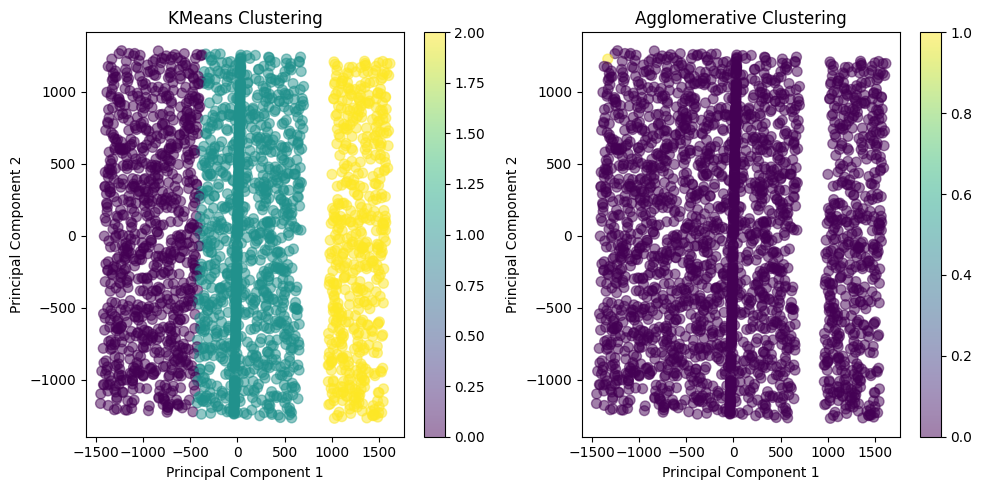

In [ ]:
from sklearn.decomposition import PCA

# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(df_file)

# Visualisasi klaster untuk KMeans
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

# Visualisasi klaster untuk Hierarchical Clustering
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=hierarchical_cluster_labels_tuned, cmap='viridis', s=50, alpha=0.5)
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()

plt.tight_layout()
plt.show()

Visualisasi tersebut menunjukkan bagaimana data terbagi menjadi beberapa kelompok (cluster) dengan dua metode berbeda: KMeans dan Hierarchical Clustering.

- KMeans:

Titik-titik pada plot diwarnai berdasarkan cluster yang ditetapkan oleh KMeans.
Warna berbeda mewakili cluster berbeda.

- Hierarchical Clustering:

Plot serupa dengan KMeans, tetapi clusternya dihasilkan oleh Hierarchical Clustering.

###**Review Process**

#####**Cross Validation**

In [ ]:
import warnings

# Definisikan metrik evaluasi
def evaluate_clustering(model,df_file):
    labels = model.fit_predict(df_file)
    return silhouette_score(df_file, labels)

# Definisikan algoritma yang akan digunakan
algorithms = {
    'KMeans': KMeans(n_clusters=3),
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3)
}

warnings.simplefilter(action='ignore', category=FutureWarning)

# Melakukan cross-validation menggunakan cross_val_score
for algorithm_name, algorithm in algorithms.items():
    print(f"Evaluasi untuk algoritma: {algorithm_name}")
    scores = cross_val_score(algorithm, df_file, cv=5, scoring=evaluate_clustering)
    print(f"Skor Silhouette: {scores}")
    print(f"Skor rata-rata Silhouette: {np.mean(scores)}")

Evaluasi untuk algoritma: KMeans
Skor Silhouette: [0.57715981 0.58265027 0.586612   0.56091208 0.57142208]
Skor rata-rata Silhouette: 0.5757512481123411
Evaluasi untuk algoritma: Agglomerative Clustering
Skor Silhouette: [0.55390801 0.54136182 0.58034631 0.56243539 0.56335954]
Skor rata-rata Silhouette: 0.5602822139241483


Output tersebut menunjukkan hasil evaluasi untuk dua algoritma clustering: KMeans dan Agglomerative Clustering. Evaluasi dilakukan dengan menggunakan skor Silhouette, yang merupakan metrik untuk mengukur kualitas pengelompokan data.

1. Algoritma KMeans:
- Skor Silhouette:
Lima nilai ditampilkan, mewakili skor Silhouette untuk setiap cluster.
Nilai yang lebih tinggi menunjukkan cluster yang lebih kompak dan terpisahkan dengan baik.
- Skor Rata-rata Silhouette:
Nilai ini merupakan rata-rata dari skor Silhouette untuk semua cluster.
Nilai rata-rata yang lebih tinggi menunjukkan pengelompokan yang lebih baik secara keseluruhan.

2. Algoritma Agglomerative Clustering:
- Skor Silhouette:
Sama seperti KMeans, lima nilai skor Silhouette ditampilkan untuk setiap cluster.
- Skor Rata-rata Silhouette:
Nilai rata-rata skor Silhouette untuk semua cluster dalam pengelompokan Agglomerative Clustering.

3. Kesimpulan:
Berdasarkan skor rata-rata Silhouette, KMeans (0.5757512481123411) memiliki kinerja yang sedikit lebih baik daripada Agglomerative Clustering (0.5602822139241483) dalam pengelompokan data ini.

#####**Feature Selection**

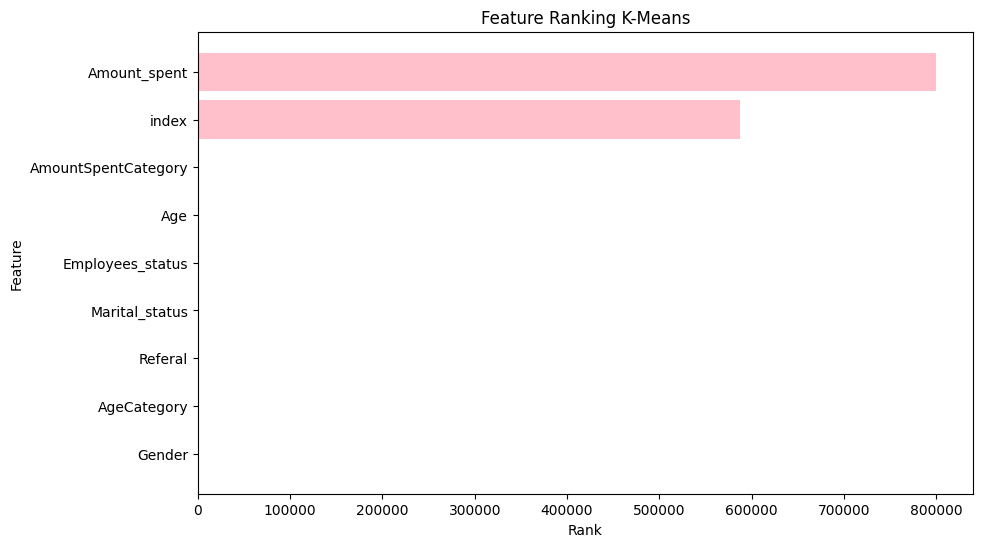

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2


# Inisialisasi model clustering (misalnya KMeans)
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_file)

# Inisialisasi selector fitur
selector = SelectKBest(score_func=chi2, k='all')

# Menggunakan metode fit_transform pada selector
x_selected = selector.fit_transform(df_file, kmeans.labels_)

# Mengambil skor fitur
feature_ranks = selector.scores_

# Mengambil nama fitur
feature_names = df_file.columns

# Membuat DataFrame untuk menyimpan skor fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan skor fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='pink')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking K-Means')
plt.gca().invert_yaxis()
plt.show()


1. Tabel Peringkatan Fitur (DataFrame): Ini adalah tabel yang berisi dua kolom:
- Fitur: Nama-nama fitur dalam kumpulan data Anda.
- Peringkat: Skor yang menunjukkan pentingnya setiap fitur untuk pengelompokan menggunakan K-Means. Semakin tinggi skor, semakin penting fitur tersebut.

2. Diagram Batang (Bar Chart): Ini adalah visualisasi peringkat fitur, di mana fitur yang paling penting berada di bagian atas.

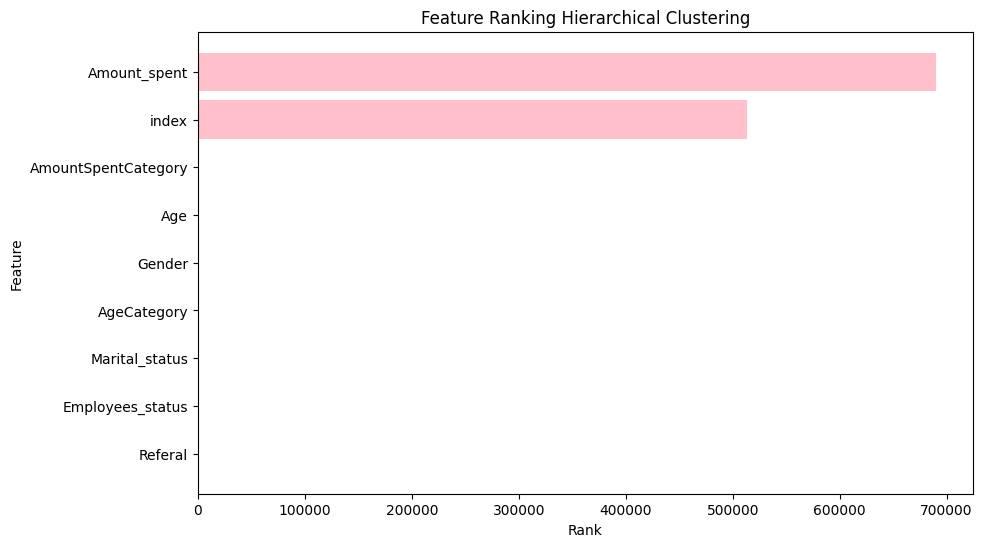

In [ ]:
# Inisialisasi model clustering hirarkis (Agglomerative Clustering)
hierarchy_clust = AgglomerativeClustering(n_clusters=3)

# Melakukan clustering pada data
hierarchy_clust.fit(df_file)

# Inisialisasi selector fitur
selector = SelectKBest(score_func=chi2, k='all')

# Menggunakan metode fit_transform pada selector
x_selected = selector.fit_transform(df_file, hierarchy_clust.labels_)

# Mengambil skor fitur
feature_ranks = selector.scores_

# Mengambil nama fitur
feature_names = df_file.columns

# Membuat DataFrame untuk menyimpan skor fitur
feature_ranks_df = pd.DataFrame({'Feature': feature_names, 'Rank': feature_ranks})

# Mengurutkan DataFrame berdasarkan skor fitur
feature_ranks_df = feature_ranks_df.sort_values(by='Rank', ascending=False)

# Membuat plot
plt.figure(figsize=(10, 6))
plt.barh(feature_ranks_df['Feature'], feature_ranks_df['Rank'], color='pink')
plt.xlabel('Rank')
plt.ylabel('Feature')
plt.title('Feature Ranking Hierarchical Clustering')
plt.gca().invert_yaxis()
plt.show()

1. Tabel Peringkatan Fitur (DataFrame): Ini adalah tabel yang berisi dua kolom:
- Fitur: Nama-nama fitur dalam kumpulan data Anda.
- Peringkat: Skor yang menunjukkan pentingnya setiap fitur untuk pengelompokan menggunakan K-Means. Semakin tinggi skor, semakin penting fitur tersebut.

2. Diagram Batang (Bar Chart): Ini adalah visualisasi peringkat fitur, di mana fitur yang paling penting berada di bagian atas.

####**Tuning Hyperparameter**

#####**K-Means**

In [ ]:
param_grid = {
    'n_clusters': [3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'algorithm': ['lloyd', 'elkan']
}

# Evaluasi kualitas klastering menggunakan Silhouette Score
best_score = -1
best_params = None

for n_clusters in param_grid['n_clusters']:
    for init in param_grid['init']:
        for algorithm in param_grid['algorithm']:
            kmeans = KMeans(n_clusters=n_clusters, init=init, algorithm=algorithm, random_state=42, n_init='auto')
            labels = kmeans.fit_predict(df_file)
            silhouette_avg = silhouette_score(df_file, labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'n_clusters': n_clusters, 'init': init, 'algorithm': algorithm}

# Menampilkan parameter dengan Silhouette Score terbaik
print("\nParameter terbaik :")
print(best_params)
print("Silhouette Score :", best_score)


Parameter terbaik :
{'n_clusters': 6, 'init': 'random', 'algorithm': 'lloyd'}
Silhouette Score : 0.4034600238781838


1. Parameter Terbaik: Bagian ini menunjukkan parameter terbaik yang ditemukan untuk model K-Means Anda.
- n_clusters: 6 (jumlah cluster terbaik adalah 6).
- init: 'random' (metode inisialisasi terbaik adalah memilih centroid awal secara acak).
- algorithm: 'lloyd' (algoritma terbaik untuk pembaruan centroid adalah algoritma Lloyd standar).

2. Silhouette Score: Nilai ini menunjukkan kualitas pengelompokan yang dihasilkan oleh parameter terbaik.
- Nilai Silhouette Score berada di antara -1 dan 1.
Semakin dekat ke 1, semakin baik pemisahan antara cluster.
- Nilai 0.4 bisa dikatakan sebagai pengelompokan moderat.

#####**Hierarchical Clustering**

In [ ]:
param_grid = {
    'linkage': ['complete', 'average', 'single'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

best_score = -1
best_params = None

for metric in param_grid['metric']:
  for linkage in param_grid['linkage']:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= metric, linkage= linkage)
    labels = hierarchical_clustering.fit_predict(df_file)
    silhouette_avg = silhouette_score(df_file, labels)
    if silhouette_avg > best_score:
                best_score = silhouette_avg
                best_params = {'metric': metric, 'linkage': linkage}

hierarchical_clustering = AgglomerativeClustering(n_clusters=3, metric= 'euclidean', linkage= 'ward')
labels = hierarchical_clustering.fit_predict(df_file)
silhouette_avg = silhouette_score(df_file, labels)

print("\nParameter terbaik :")
print(best_params)
print("Silhouette Score :", best_score)


Parameter terbaik :
{'metric': 'euclidean', 'linkage': 'average'}
Silhouette Score : 0.3695235322510621


Penjelasan Output
Output yang Anda berikan menunjukkan hasil dari pencarian parameter terbaik untuk model Hierarchical Clustering:

1. Parameter Terbaik:
- metric: 'euclidean' (metrik yang digunakan untuk menghitung jarak antar data point adalah Euclidean distance).
- linkage: 'average' (metode yang digunakan untuk menggabungkan cluster adalah average linkage).
- Silhouette Score: 0.3695235322510621

2. Penjelasan:
- Nilai Silhouette Score menunjukkan kualitas pengelompokan yang dihasilkan oleh parameter terbaik.
- Nilai Silhouette Score berada di antara -1 dan 1.
- Semakin dekat ke 1, semakin baik pemisahan antara cluster.
- Nilai 0.37 bisa dikatakan sebagai pengelompokan moderat.

In [ ]:
hierarchical_cluster_tuned = AgglomerativeClustering(metric='cosine', linkage='single')

hierarchical_cluster_tuned

AgglomerativeClustering(linkage='single', metric='cosine')

1. Algoritma clustering yang digunakan adalah Agglomerative Clustering:
- Algoritma ini menggunakan strategi bottom-up untuk mengelompokkan data.
- Dimulai dengan setiap data point sebagai cluster terpisah dan kemudian menggabungkan cluster yang paling mirip secara bertahap.
- Proses penggabungan berlanjut hingga jumlah cluster yang diinginkan tercapai atau kriteria tertentu terpenuhi.

2. Parameter yang digunakan untuk algoritma ini adalah:
- linkage: 'single' (menggabungkan cluster berdasarkan jarak minimum antar data point dalam cluster).
- metric: 'cosine' (menggunakan cosine similarity untuk mengukur kesamaan antar data point).

##**Determine Next Steps**

Berdasarkan analisis menggunakan model Associate sebelumnya, dua metode klastering yang dievaluasi adalah KMeans dan Agglomerative Clustering. Evaluasi dilakukan dengan menggunakan beberapa metrik seperti Silhouette Score, Calinski-Harabasz Score, Davies-Bouldin Score, dan Dunn Index. Hasil evaluasi menunjukkan bahwa KMeans memiliki performa yang sedikit lebih unggul jika dibandingkan dengan Agglomerative Clustering. Dalam hal ini, KMeans mampu menghasilkan cluster yang lebih terpusat dan jelas dalam memisahkan data.

Fitur penting yang ada pada dataset juga perlu diperhatikan yakni Amount Spent yang dimana fitur ini dapat memberikan wawasan dalam memahami faktor-faktor yang mempengaruhi seseorang untuk berbelanja di online store.